In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools

from math import sqrt
from numpy import concatenate
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller

# First of all, the task that I was assigned to do is forecasting on times series

### Q: How time series problems are different from traditional machine learning problems?
### Answer : In tradiational machine learning problems you have variables x1,x2,x3...xn and a target variable Y.
### Now we train our model such that depends on x1,x2,x3,...xn are dependent on the variable and x1,x2,x3 are known as independent variables
### In time series we do not have indepedent and dependent variables, but we have one variable.
### Time series can have trend seasonality and unexpected events
### Statistical methods for time series forecasting assumes that the time series are stationary
### In our real world stationary time series are not as usual as we would like, so there are forecasting methods for non-stationary time series, as well.

In [2]:
# See the data
demographics = pd.read_csv(r'C:\Users\anget\OneDrive\Desktop\gelato_interview_kaglle_dataset\archive\train_OwBvO8W\demographics.csv')
demographics.head()

,Agency,Avg_Population_2017,Avg_Yearly_Household_Income_2017
0,Agency_05,3044268,182944
1,Agency_02,3137874,240809
2,Agency_55,2025793,238553
3,Agency_53,1729177,111048
4,Agency_50,2057678,144594


In [3]:
event = pd.read_csv(r'C:\Users\anget\OneDrive\Desktop\gelato_interview_kaglle_dataset\archive\train_OwBvO8W\event_calendar.csv')
event['YearMonth']  = pd.to_datetime(event['YearMonth'],format='%Y%m')
event.head()

,YearMonth,Easter Day,Good Friday,New Year,Christmas,Labor Day,Independence Day,Revolution Day Memorial,Regional Games,FIFA U-17 World Cup,Football Gold Cup,Beer Capital,Music Fest
0,2013-01-01,0,0,1,0,0,0,0,0,0,0,0,0
1,2013-02-01,0,0,0,0,0,0,0,0,0,0,0,0
2,2013-03-01,1,1,0,0,0,0,0,0,0,0,0,1
3,2013-04-01,0,0,0,0,0,0,0,0,0,0,0,0
4,2013-05-01,0,0,0,0,1,0,0,0,0,0,0,0


In [4]:
historical = pd.read_csv(r'C:\Users\anget\OneDrive\Desktop\gelato_interview_kaglle_dataset\archive\train_OwBvO8W\historical_volume.csv')
historical['YearMonth'] = pd.to_datetime(historical['YearMonth'],format='%Y%m')
historical.head()

,Agency,SKU,YearMonth,Volume
0,Agency_22,SKU_01,2013-01-01,52.2720
1,Agency_22,SKU_02,2013-01-01,110.7000
2,Agency_58,SKU_23,2013-01-01,0.0000
3,Agency_48,SKU_07,2013-01-01,28.3200
4,Agency_22,SKU_05,2013-01-01,238.5387


In [5]:
soda = pd.read_csv(r'C:\Users\anget\OneDrive\Desktop\gelato_interview_kaglle_dataset\archive\train_OwBvO8W\industry_soda_sales.csv')
soda['YearMonth'] = pd.to_datetime(soda['YearMonth'],format='%Y%m')
soda.head()

,YearMonth,Soda_Volume
0,2013-01-01,718394219
1,2013-02-01,753938444
2,2013-03-01,892192092
3,2013-04-01,838099501
4,2013-05-01,864420003


In [6]:
industry = pd.read_csv(r'C:\Users\anget\OneDrive\Desktop\gelato_interview_kaglle_dataset\archive\train_OwBvO8W\industry_volume.csv')
industry['YearMonth'] = pd.to_datetime(industry['YearMonth'],format='%Y%m')
industry.head()

,YearMonth,Industry_Volume
0,2013-01-01,492612703
1,2013-02-01,431937346
2,2013-03-01,509281531
3,2013-04-01,532390389
4,2013-05-01,551755254


In [7]:
price = pd.read_csv(r'C:\Users\anget\OneDrive\Desktop\gelato_interview_kaglle_dataset\archive\train_OwBvO8W\price_sales_promotion.csv')
price['YearMonth'] = pd.to_datetime(price['YearMonth'],format='%Y%m')
price.head()

,Agency,SKU,YearMonth,Price,Sales,Promotions
0,Agency_01,SKU_01,2013-01-01,1141.500000,1033.432731,108.067269
1,Agency_01,SKU_01,2013-02-01,1141.500000,1065.417195,76.082805
2,Agency_01,SKU_01,2013-03-01,1179.345820,1101.133633,78.212187
3,Agency_01,SKU_01,2013-04-01,1226.687500,1138.283357,88.404143
4,Agency_01,SKU_01,2013-05-01,1230.331104,1148.969634,81.361470


In [8]:
weather = pd.read_csv(r'C:\Users\anget\OneDrive\Desktop\gelato_interview_kaglle_dataset\archive\train_OwBvO8W\weather.csv')
weather['YearMonth'] = pd.to_datetime(weather['YearMonth'],format='%Y%m')
weather.head()

,YearMonth,Agency,Avg_Max_Temp
0,2013-01-01,Agency_01,17.072
1,2013-02-01,Agency_01,19.984
2,2013-03-01,Agency_01,24.600
3,2013-04-01,Agency_01,27.532
4,2013-05-01,Agency_01,29.396


In [9]:
# merge all the features that depends on SKU
sku = historical.merge(price,on=['Agency','SKU','YearMonth'],how='left')
sku = sku.merge(soda,on=['YearMonth'],how='left')
sku = sku.merge(industry,on='YearMonth',how='left')
sku = sku.merge(event,on=['YearMonth'],how='left')
print(sku.shape)
sku.head()

(21000, 21)


,Agency,SKU,YearMonth,Volume,Price,Sales,Promotions,Soda_Volume,Industry_Volume,Easter Day,Good Friday,New Year,Christmas,Labor Day,Independence Day,Revolution Day Memorial,Regional Games,FIFA U-17 World Cup,Football Gold Cup,Beer Capital,Music Fest
0,Agency_22,SKU_01,2013-01-01,52.2720,1168.903668,1069.166193,99.737475,718394219,492612703,0,0,1,0,0,0,0,0,0,0,0,0
1,Agency_22,SKU_02,2013-01-01,110.7000,1167.000000,1067.257500,99.742500,718394219,492612703,0,0,1,0,0,0,0,0,0,0,0,0
2,Agency_58,SKU_23,2013-01-01,0.0000,0.000000,0.000000,0.000000,718394219,492612703,0,0,1,0,0,0,0,0,0,0,0,0
3,Agency_48,SKU_07,2013-01-01,28.3200,1143.503390,1143.503390,0.000000,718394219,492612703,0,0,1,0,0,0,0,0,0,0,0,0
4,Agency_22,SKU_05,2013-01-01,238.5387,1310.176057,1203.875711,106.300346,718394219,492612703,0,0,1,0,0,0,0,0,0,0,0,0


In [10]:
# merge all the features that depends on Agency
agency = weather.merge(demographics,on=['Agency'],how='left')
print(agency.shape)
agency.head()

(3600, 5)


,YearMonth,Agency,Avg_Max_Temp,Avg_Population_2017,Avg_Yearly_Household_Income_2017
0,2013-01-01,Agency_01,17.072,153733,120207
1,2013-02-01,Agency_01,19.984,153733,120207
2,2013-03-01,Agency_01,24.600,153733,120207
3,2013-04-01,Agency_01,27.532,153733,120207
4,2013-05-01,Agency_01,29.396,153733,120207


In [11]:
# auxilary function such that we can observe the time serie
def time_plot(data, x_col, y_col, title):
    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(x_col, y_col, data=data, ax=ax, color='mediumblue', label='Volume')    
    ax.set(xlabel = "Date",
           ylabel = "Volume",
           title = title)
    
    sns.despine()

### Now the task is forecast the demand volume for January 2018 for the top 100 SKUs at Agency_48 by cumulative volume

In [12]:
agency_48_historical_data = historical[historical['Agency']=='Agency_48']

In [13]:
agency_48_historical_data.SKU.unique()

array(['SKU_07', 'SKU_02', 'SKU_05', 'SKU_04', 'SKU_03', 'SKU_23',
       'SKU_17', 'SKU_28', 'SKU_01'], dtype=object)

### The Agency_48 has 9 different products

In [14]:
agency_48_historical_data_sku_01 = agency_48_historical_data[agency_48_historical_data['SKU']=='SKU_01']
agency_48_historical_data_sku_01 =agency_48_historical_data_sku_01.sort_values(by='YearMonth')
agency_48_historical_data_sku_01 = agency_48_historical_data_sku_01.reset_index()
agency_48_historical_data_sku_01.drop(columns=['index'], inplace=True)
agency_48_historical_data_sku_01.drop(columns=['Agency'], inplace=True)
agency_48_historical_data_sku_01.drop(columns=['SKU'], inplace=True)

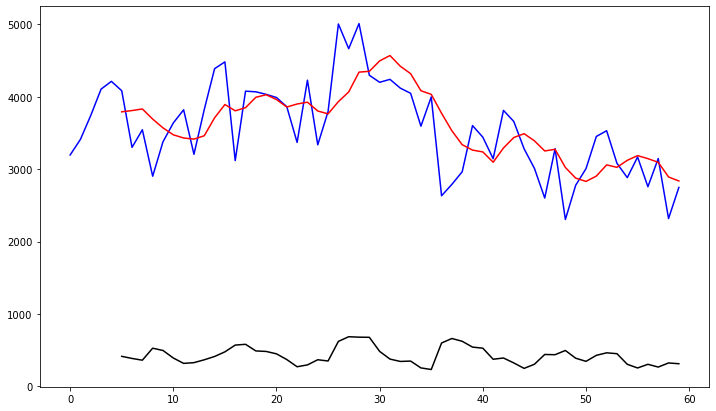

In [15]:
rollmean = agency_48_historical_data_sku_01.Volume.rolling(6).mean()
rollstd = agency_48_historical_data_sku_01.Volume.rolling(6).std()

plt.figure(figsize=(12,7))
fig = plt.figure(1)

#Plot rolling statistics:
original = plt.plot(agency_48_historical_data_sku_01.Volume, color='blue', label='original')
mean = plt.plot(rollmean, color='red', label='Rolling Mean')
std = plt.plot(rollstd, color='black', label='Rolling Std')

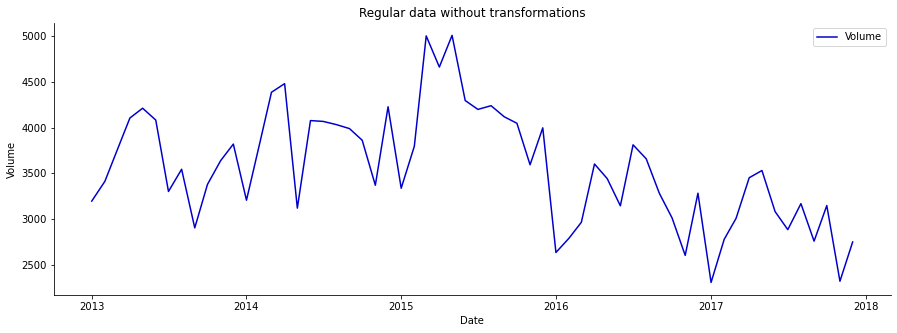

In [16]:
time_plot(agency_48_historical_data_sku_01,'YearMonth', 'Volume','Regular data without transformations')

In [17]:
result = adfuller(agency_48_historical_data_sku_01.Volume)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.300709
p-value: 0.171739
Critical Values:
	1%: -3.548
	5%: -2.913
	10%: -2.594


ADF Statistic: -2.201445
p-value: 0.205721
Critical Values:
	1%: -3.548
	5%: -2.913
	10%: -2.594


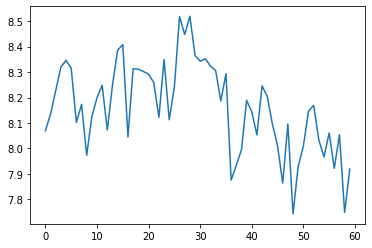

In [18]:
ts_log1 = np.log(agency_48_historical_data_sku_01.Volume)
plt.plot(ts_log1)
result = adfuller(ts_log1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.126891
p-value: 0.000000
Critical Values:
	1%: -3.548
	5%: -2.913
	10%: -2.594


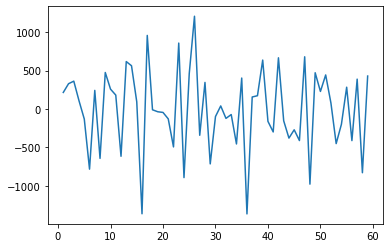

In [19]:
agency_48_historical_data_sku_01_diff = agency_48_historical_data_sku_01.Volume - agency_48_historical_data_sku_01.Volume.shift()
plt.plot(agency_48_historical_data_sku_01_diff)
result = adfuller(agency_48_historical_data_sku_01_diff.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.551587
p-value: 0.000000
Critical Values:
	1%: -3.548
	5%: -2.913
	10%: -2.594


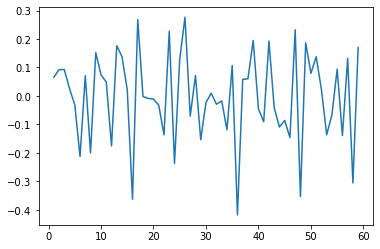

In [20]:
agency_48_historical_data_sku_01_log_diff = ts_log1 - ts_log1.shift()
plt.plot(agency_48_historical_data_sku_01_log_diff)
result = adfuller(agency_48_historical_data_sku_01_log_diff.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

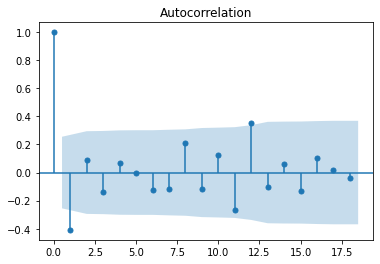

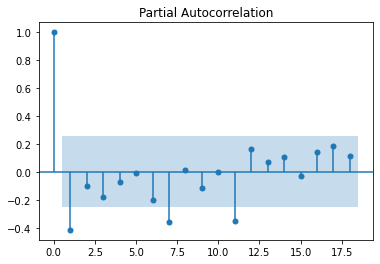

In [21]:
plot_acf(agency_48_historical_data_sku_01_log_diff.dropna())
pyplot.show()
plot_pacf(agency_48_historical_data_sku_01_log_diff.dropna())
pyplot.show()

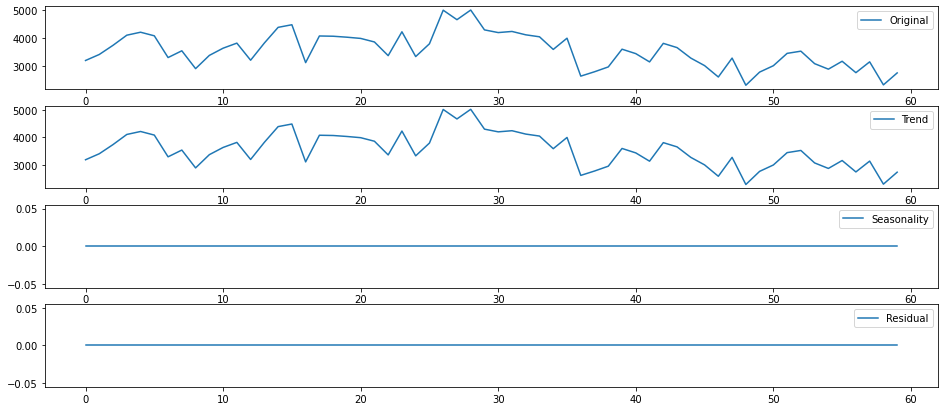

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(agency_48_historical_data_sku_01.Volume, freq=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(agency_48_historical_data_sku_01.Volume, label='Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc = 'best')

In [23]:
# SKU_01 is on the stationary form

In [24]:
# Since with the difference by one timestep we obtain p-value 0 we reject our null hypothesis and we consider our tranformed time
# time serie as a stationary

Text(0.5, 1.0, 'RMSE: 1610.0352')

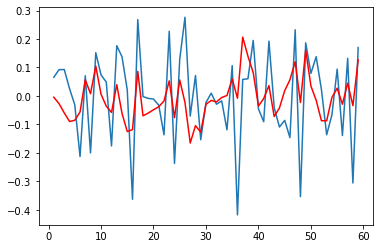

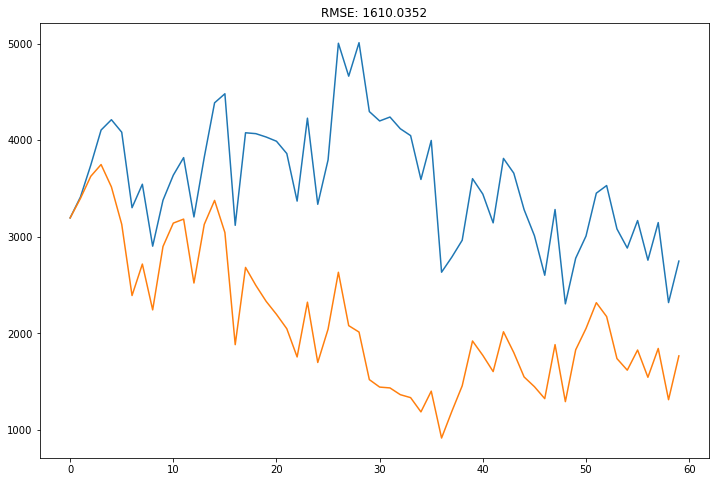

In [25]:
model_sku_01 = ARIMA(ts_log1, order = (1,1,1))
results_ARIMA_sku_01 = model_sku_01.fit(disp=-1)
plt.plot(agency_48_historical_data_sku_01_log_diff)
plt.plot(results_ARIMA_sku_01.fittedvalues, color = 'red')
plt.figure(figsize=(12,8))
predictions_of_arima_sku_01_different =  pd.Series(results_ARIMA_sku_01.fittedvalues, copy=True)
predictions_of_arima_sku_01_different_cumsum = predictions_of_arima_sku_01_different.cumsum()
predictions_of_arima_sku_01_log = pd.Series(ts_log1, index=ts_log1.index)
predictions_of_arima_sku_01_log = predictions_of_arima_sku_01_log.add(predictions_of_arima_sku_01_different_cumsum, fill_value=0)
predictions_sku_01 = np.exp(predictions_of_arima_sku_01_log)
plt.plot(agency_48_historical_data_sku_01.Volume)
plt.plot(predictions_sku_01)
plt.title("RMSE: %.4f"% np.sqrt(sum((predictions_sku_01 - agency_48_historical_data_sku_01.Volume)**2)/len(agency_48_historical_data_sku_01.Volume)))

Text(0.5, 1.0, 'RMSE: 2039.4550')

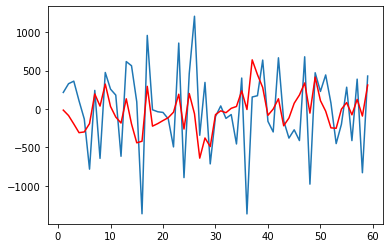

<Figure size 864x576 with 0 Axes>

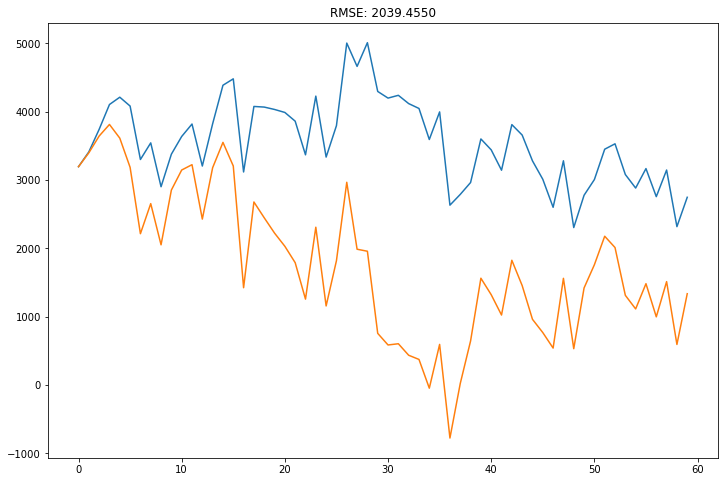

In [26]:
model_sku_01 = ARIMA(agency_48_historical_data_sku_01.Volume, order = (1,1,1))
results_ARIMA_sku_01 = model_sku_01.fit(disp=-1)
plt.plot(agency_48_historical_data_sku_01_diff)
plt.plot(results_ARIMA_sku_01.fittedvalues, color = 'red')
plt.figure(figsize=(12,8))

plt.figure(figsize=(12,8))
predictions_of_arima_sku_01_different =  pd.Series(results_ARIMA_sku_01.fittedvalues, copy=True)
predictions_of_arima_sku_01_different_cumsum = predictions_of_arima_sku_01_different.cumsum()

predictions_of_arima_sku_01 = pd.Series(agency_48_historical_data_sku_01.Volume, index=agency_48_historical_data_sku_01.Volume.index)
predictions_of_arima_sku_01 = predictions_of_arima_sku_01.add(predictions_of_arima_sku_01_different_cumsum, fill_value=0)
predictions_sku_01 = predictions_of_arima_sku_01
plt.plot(agency_48_historical_data_sku_01.Volume)
plt.plot(predictions_sku_01)
plt.title("RMSE: %.4f"% np.sqrt(sum((predictions_sku_01 - agency_48_historical_data_sku_01.Volume)**2)/len(agency_48_historical_data_sku_01.Volume)))

In [28]:
forecast = results_ARIMA_sku_01.forecast()[0]
print(forecast, 'Volume forecasting for January 2018')

[2793.05723882] Volume forecasting for January 2018


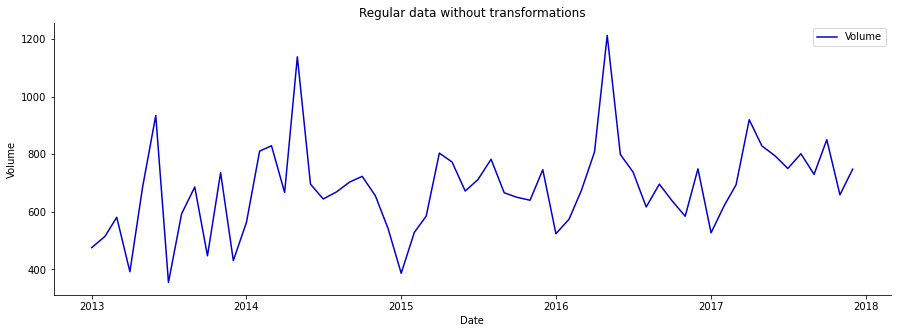

In [29]:
agency_48_historical_data_sku_02 = agency_48_historical_data[agency_48_historical_data['SKU']=='SKU_02']
agency_48_historical_data_sku_02 =agency_48_historical_data_sku_02.sort_values(by='YearMonth')
agency_48_historical_data_sku_02 = agency_48_historical_data_sku_02.reset_index()
agency_48_historical_data_sku_02.drop(columns=['index'], inplace=True)
agency_48_historical_data_sku_02.drop(columns=['Agency'], inplace=True)
agency_48_historical_data_sku_02.drop(columns=['SKU'], inplace=True)
time_plot(agency_48_historical_data_sku_02,'YearMonth', 'Volume','Regular data without transformations')

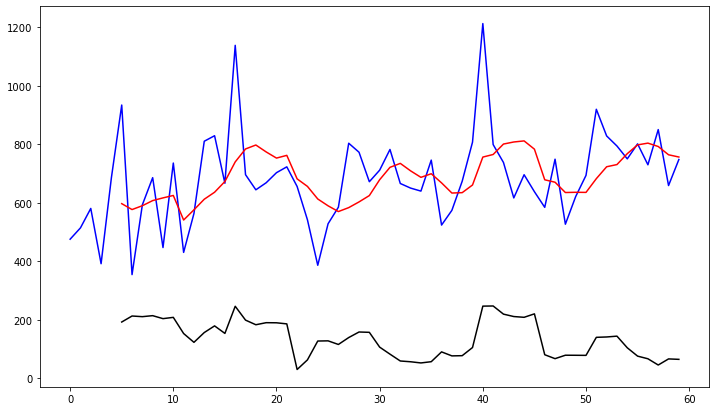

In [30]:
rollmean = agency_48_historical_data_sku_02.Volume.rolling(6).mean()
rollstd = agency_48_historical_data_sku_02.Volume.rolling(6).std()

plt.figure(figsize=(12,7))
fig = plt.figure(1)

#Plot rolling statistics:
original = plt.plot(agency_48_historical_data_sku_02.Volume, color='blue', label='original')
mean = plt.plot(rollmean, color='red', label='Rolling Mean')
std = plt.plot(rollstd, color='black', label='Rolling Std')

In [31]:
result = adfuller(agency_48_historical_data_sku_02.Volume)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.009976
p-value: 0.000000
Critical Values:
	1%: -3.546
	5%: -2.912
	10%: -2.594


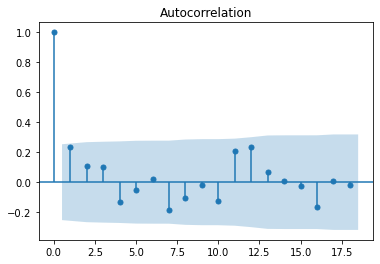

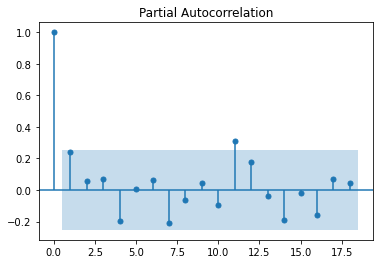

In [32]:
plot_acf(agency_48_historical_data_sku_02.Volume)
pyplot.show()
plot_pacf(agency_48_historical_data_sku_02.Volume)
pyplot.show()

ADF Statistic: -4.799433
p-value: 0.000055
Critical Values:
	1%: -3.575
	5%: -2.924
	10%: -2.600


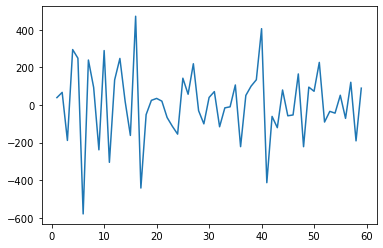

In [33]:
agency_48_historical_data_sku_02_diff = agency_48_historical_data_sku_02.Volume - agency_48_historical_data_sku_02.Volume.shift()
plt.plot(agency_48_historical_data_sku_02_diff)
result = adfuller(agency_48_historical_data_sku_02_diff.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

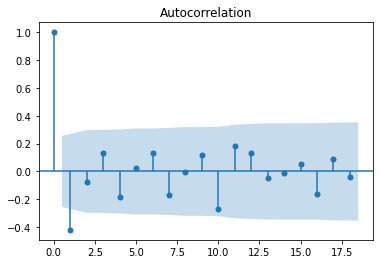

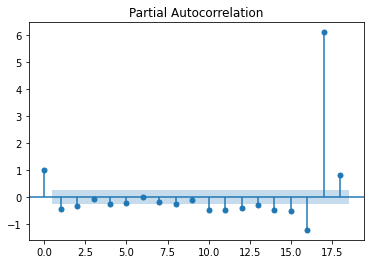

In [34]:
plot_acf(agency_48_historical_data_sku_02_diff.dropna())
pyplot.show()
plot_pacf(agency_48_historical_data_sku_02_diff.dropna())
pyplot.show()

Text(0.5, 1.0, 'RMSE: 504.6012')

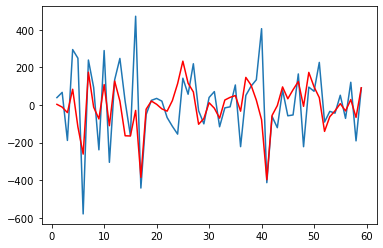

<Figure size 864x576 with 0 Axes>

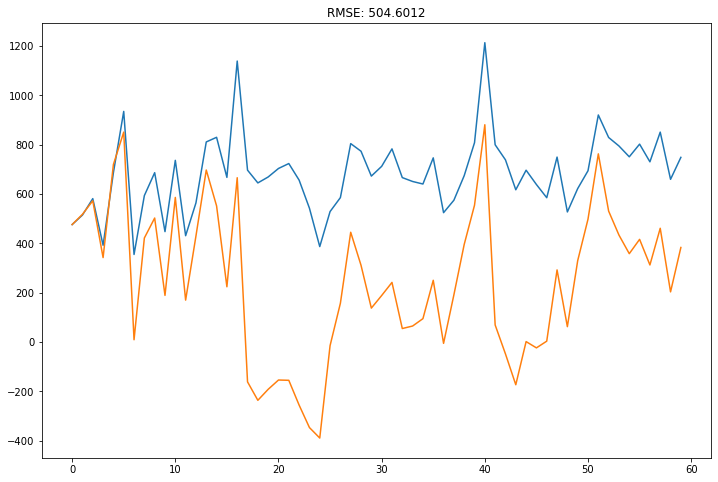

In [35]:
model_sku_02 = ARIMA(agency_48_historical_data_sku_02.Volume, order = (1,1,1))
results_ARIMA_sku_02 = model_sku_02.fit(disp=-1)
plt.plot(agency_48_historical_data_sku_02_diff)
plt.plot(results_ARIMA_sku_02.fittedvalues, color = 'red')
plt.figure(figsize=(12,8))

plt.figure(figsize=(12,8))
predictions_of_arima_sku_02_different =  pd.Series(results_ARIMA_sku_02.fittedvalues, copy=True)
predictions_of_arima_sku_02_different_cumsum = predictions_of_arima_sku_02_different.cumsum()

predictions_of_arima_sku_02 = pd.Series(agency_48_historical_data_sku_02.Volume, index=agency_48_historical_data_sku_02.Volume.index)
predictions_of_arima_sku_02 = predictions_of_arima_sku_02.add(predictions_of_arima_sku_02_different_cumsum, fill_value=0)
predictions_sku_02 = predictions_of_arima_sku_02
plt.plot(agency_48_historical_data_sku_02.Volume)
plt.plot(predictions_sku_02)
plt.title("RMSE: %.4f"% np.sqrt(sum((predictions_sku_02 - agency_48_historical_data_sku_02.Volume)**2)/len(agency_48_historical_data_sku_02.Volume)))

In [36]:
forecast = results_ARIMA_sku_02.forecast()[0]
print(forecast,'Volume forecasting for Agency 48 for the SKU 02 in January 2018')

[768.48556162] Volume forecasting for Agency 48 for the SKU 02 in January 2018


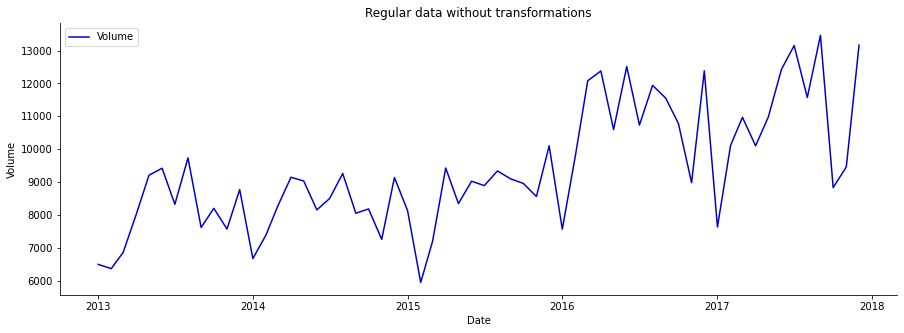

In [37]:
agency_48_historical_data_sku_03 = agency_48_historical_data[agency_48_historical_data['SKU']=='SKU_03']
agency_48_historical_data_sku_03 =agency_48_historical_data_sku_03.sort_values(by='YearMonth')
agency_48_historical_data_sku_03 = agency_48_historical_data_sku_03.reset_index()
agency_48_historical_data_sku_03.drop(columns=['index'], inplace=True)
agency_48_historical_data_sku_03.drop(columns=['Agency'], inplace=True)
agency_48_historical_data_sku_03.drop(columns=['SKU'], inplace=True)
time_plot(agency_48_historical_data_sku_03,'YearMonth', 'Volume','Regular data without transformations')

In [38]:
result = adfuller(agency_48_historical_data_sku_03.Volume)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.057674
p-value: 0.261871
Critical Values:
	1%: -3.551
	5%: -2.914
	10%: -2.595


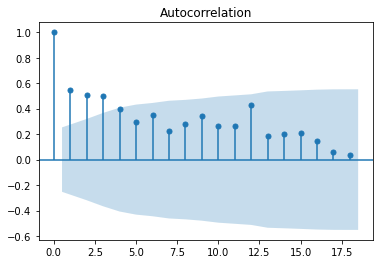

In [39]:
plot_acf(agency_48_historical_data_sku_03.Volume)
pyplot.show()

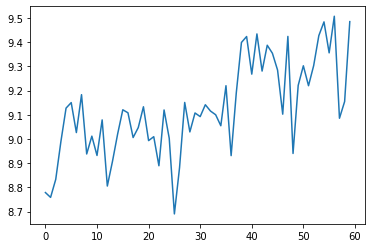

In [40]:
ts_log3 = np.log(agency_48_historical_data_sku_03.Volume)
plt.plot(ts_log3)

In [41]:
result = adfuller(ts_log3)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.324614
p-value: 0.164152
Critical Values:
	1%: -3.551
	5%: -2.914
	10%: -2.595


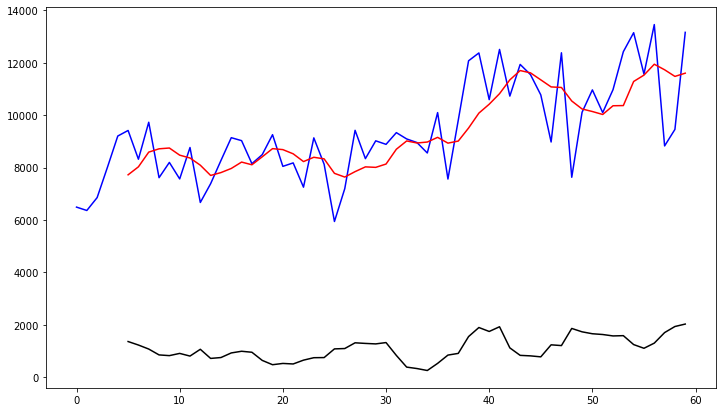

In [42]:
rollmean = agency_48_historical_data_sku_03.Volume.rolling(6).mean()
rollstd = agency_48_historical_data_sku_03.Volume.rolling(6).std()

plt.figure(figsize=(12,7))
fig = plt.figure(1)

#Plot rolling statistics:
original = plt.plot(agency_48_historical_data_sku_03.Volume, color='blue', label='original')
mean = plt.plot(rollmean, color='red', label='Rolling Mean')
std = plt.plot(rollstd, color='black', label='Rolling Std')

ADF Statistic: -3.023005
p-value: 0.032801
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


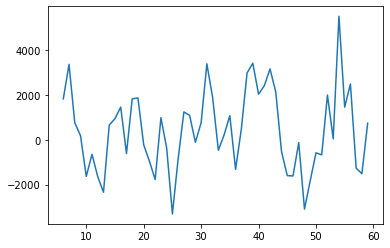

In [43]:
agency_48_historical_data_sku_03_diff = agency_48_historical_data_sku_03.Volume - agency_48_historical_data_sku_03.Volume.shift(6)
plt.plot(agency_48_historical_data_sku_03_diff)
result = adfuller(agency_48_historical_data_sku_03_diff.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.230934
p-value: 0.195210
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


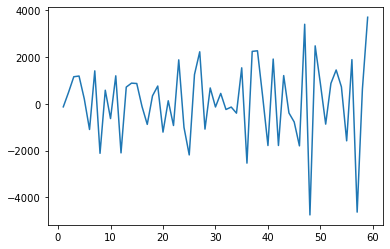

In [44]:
agency_48_historical_data_sku_03_diff = agency_48_historical_data_sku_03.Volume - agency_48_historical_data_sku_03.Volume.shift(1)
plt.plot(agency_48_historical_data_sku_03_diff)
result = adfuller(agency_48_historical_data_sku_03_diff.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

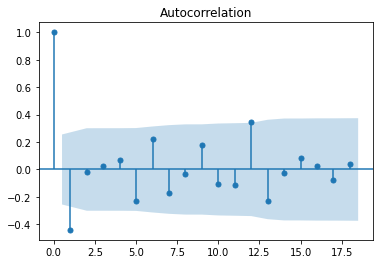

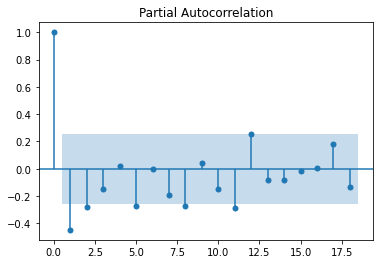

In [45]:
plot_acf(agency_48_historical_data_sku_03_diff.dropna())
pyplot.show()
plot_pacf(agency_48_historical_data_sku_03_diff.dropna())
pyplot.show()

Text(0.5, 1.0, 'RMSE: 5590.8121')

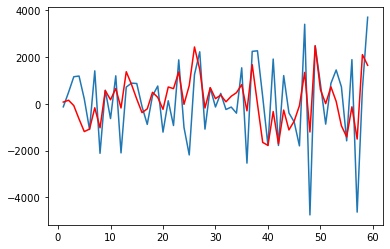

<Figure size 864x576 with 0 Axes>

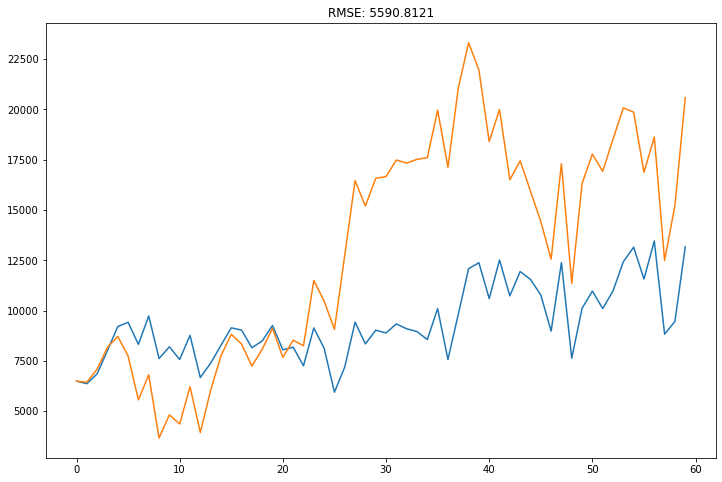

In [46]:
model_sku_03 = ARIMA(agency_48_historical_data_sku_03.Volume, order = (1,1,1))
results_ARIMA_sku_03 = model_sku_03.fit(disp=-1)
plt.plot(agency_48_historical_data_sku_03_diff)
plt.plot(results_ARIMA_sku_03.fittedvalues, color = 'red')
plt.figure(figsize=(12,8))

plt.figure(figsize=(12,8))
predictions_of_arima_sku_03_different =  pd.Series(results_ARIMA_sku_03.fittedvalues, copy=True)
predictions_of_arima_sku_03_different_cumsum = predictions_of_arima_sku_03_different.cumsum()

predictions_of_arima_sku_03 = pd.Series(agency_48_historical_data_sku_03.Volume, index=agency_48_historical_data_sku_03.Volume.index)
predictions_of_arima_sku_03 = predictions_of_arima_sku_03.add(predictions_of_arima_sku_03_different_cumsum, fill_value=0)
predictions_sku_03 = predictions_of_arima_sku_03
plt.plot(agency_48_historical_data_sku_03.Volume)
plt.plot(predictions_sku_03)
plt.title("RMSE: %.4f"% np.sqrt(sum((predictions_sku_03 - agency_48_historical_data_sku_03.Volume)**2)/len(agency_48_historical_data_sku_03.Volume)))

In [47]:
forecast = results_ARIMA_sku_03.forecast()[0]
print(forecast, 'Volume forecasting for the SKU_03 on Agency 48 in January 2018')

[11988.95878521] Volume forecasting for the SKU_03 on Agency 48 in January 2018


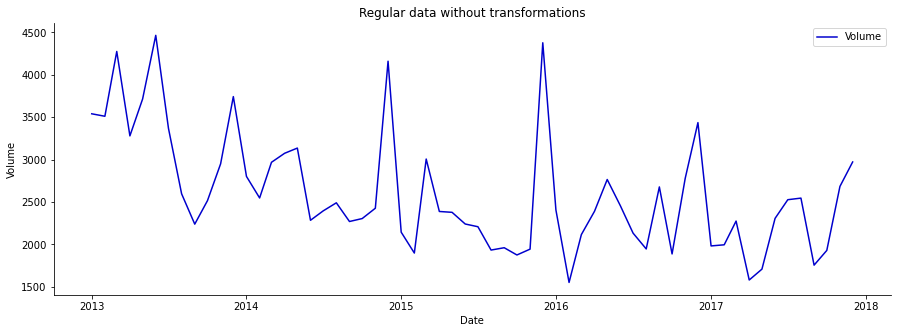

In [48]:
agency_48_historical_data_sku_04 = agency_48_historical_data[agency_48_historical_data['SKU']=='SKU_04']
agency_48_historical_data_sku_04 =agency_48_historical_data_sku_04.sort_values(by='YearMonth')
agency_48_historical_data_sku_04 = agency_48_historical_data_sku_04.reset_index()
agency_48_historical_data_sku_04.drop(columns=['index'], inplace=True)
agency_48_historical_data_sku_04.drop(columns=['Agency'], inplace=True)
agency_48_historical_data_sku_04.drop(columns=['SKU'], inplace=True)
time_plot(agency_48_historical_data_sku_04,'YearMonth', 'Volume','Regular data without transformations')

In [49]:
result = adfuller(agency_48_historical_data_sku_04.Volume)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.195650
p-value: 0.020238
Critical Values:
	1%: -3.575
	5%: -2.924
	10%: -2.600


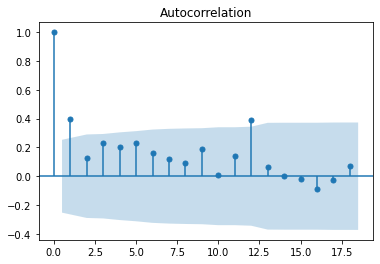

In [50]:
plot_acf(agency_48_historical_data_sku_04.Volume)
pyplot.show()

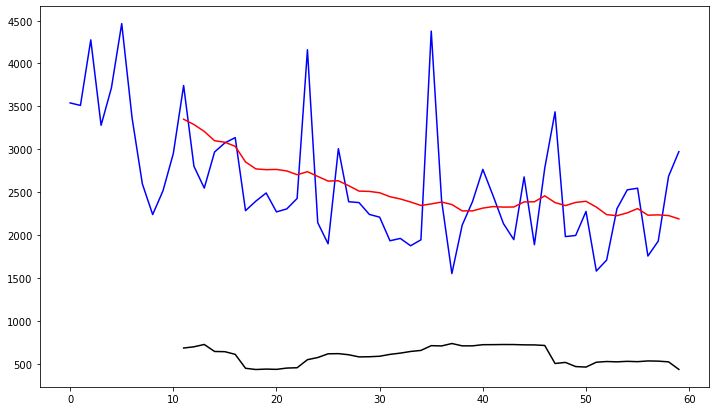

In [51]:
rollmean = agency_48_historical_data_sku_04.Volume.rolling(12).mean()
rollstd = agency_48_historical_data_sku_04.Volume.rolling(12).std()

plt.figure(figsize=(12,7))
fig = plt.figure(1)

#Plot rolling statistics:
original = plt.plot(agency_48_historical_data_sku_04.Volume, color='blue', label='original')
mean = plt.plot(rollmean, color='red', label='Rolling Mean')
std = plt.plot(rollstd, color='black', label='Rolling Std')

ADF Statistic: -4.822328
p-value: 0.000049
Critical Values:
	1%: -3.575
	5%: -2.924
	10%: -2.600


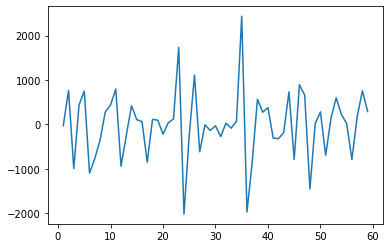

In [52]:
agency_48_historical_data_sku_04_diff = agency_48_historical_data_sku_04.Volume - agency_48_historical_data_sku_04.Volume.shift()
plt.plot(agency_48_historical_data_sku_04_diff)
result = adfuller(agency_48_historical_data_sku_04_diff.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

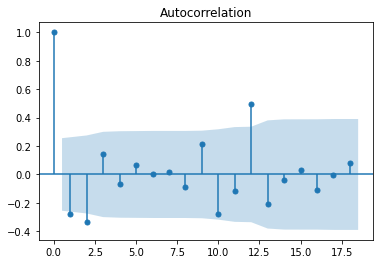

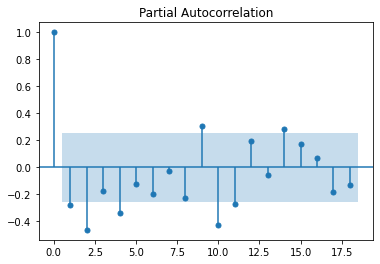

In [53]:
plot_acf(agency_48_historical_data_sku_04_diff.dropna())
pyplot.show()
plot_pacf(agency_48_historical_data_sku_04_diff.dropna())
pyplot.show()

Text(0.5, 1.0, 'RMSE: 4010.3846')

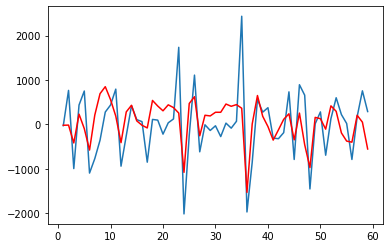

<Figure size 864x576 with 0 Axes>

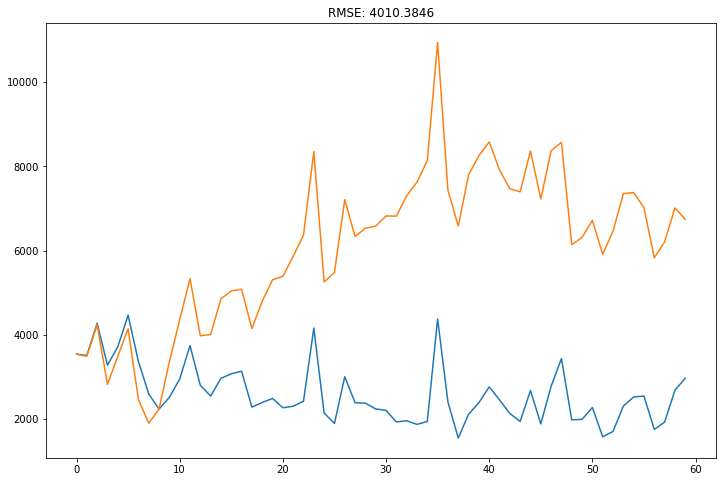

In [54]:
model_sku_04 = ARIMA(agency_48_historical_data_sku_04.Volume, order = (1,1,1))
results_ARIMA_sku_04 = model_sku_04.fit(disp=-1)
plt.plot(agency_48_historical_data_sku_04_diff)
plt.plot(results_ARIMA_sku_04.fittedvalues, color = 'red')
plt.figure(figsize=(12,8))

plt.figure(figsize=(12,8))
predictions_of_arima_sku_04_different =  pd.Series(results_ARIMA_sku_04.fittedvalues, copy=True)
predictions_of_arima_sku_04_different_cumsum = predictions_of_arima_sku_04_different.cumsum()

predictions_of_arima_sku_04 = pd.Series(agency_48_historical_data_sku_04.Volume, index=agency_48_historical_data_sku_04.Volume.index)
predictions_of_arima_sku_04 = predictions_of_arima_sku_04.add(predictions_of_arima_sku_04_different_cumsum, fill_value=0)
predictions_sku_04 = predictions_of_arima_sku_04
plt.plot(agency_48_historical_data_sku_04.Volume)
plt.plot(predictions_sku_04)
plt.title("RMSE: %.4f"% np.sqrt(sum((predictions_sku_04 - agency_48_historical_data_sku_04.Volume)**2)/len(agency_48_historical_data_sku_04.Volume)))

In [55]:
forecast = results_ARIMA_sku_04.forecast()[0]
print(forecast, 'Volume forecasting for the SKU_04 on Agency 48 in January 2018')

[2171.48158108] Volume forecasting for the SKU_04 on Agency 48 in January 2018


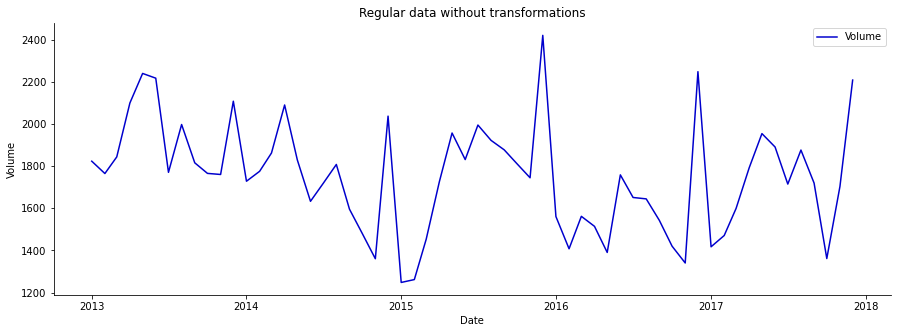

In [56]:
agency_48_historical_data_sku_05 = agency_48_historical_data[agency_48_historical_data['SKU']=='SKU_05']
agency_48_historical_data_sku_05 =agency_48_historical_data_sku_05.sort_values(by='YearMonth')
agency_48_historical_data_sku_05 = agency_48_historical_data_sku_05.reset_index()
agency_48_historical_data_sku_05.drop(columns=['index'], inplace=True)
agency_48_historical_data_sku_05.drop(columns=['Agency'], inplace=True)
agency_48_historical_data_sku_05.drop(columns=['SKU'], inplace=True)
time_plot(agency_48_historical_data_sku_05,'YearMonth', 'Volume','Regular data without transformations')

In [57]:
result = adfuller(agency_48_historical_data_sku_05.Volume)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.748733
p-value: 0.406195
Critical Values:
	1%: -3.575
	5%: -2.924
	10%: -2.600


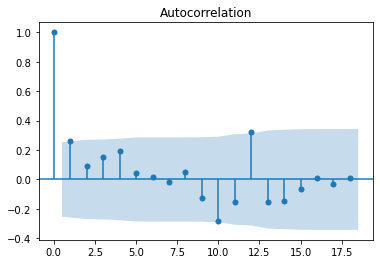

In [58]:
plot_acf(agency_48_historical_data_sku_05.Volume)
pyplot.show()

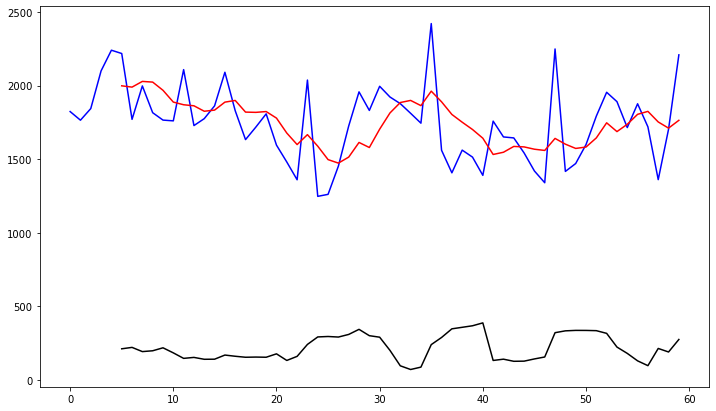

In [59]:
rollmean = agency_48_historical_data_sku_05.Volume.rolling(6).mean()
rollstd = agency_48_historical_data_sku_05.Volume.rolling(6).std()

plt.figure(figsize=(12,7))
fig = plt.figure(1)

#Plot rolling statistics:
original = plt.plot(agency_48_historical_data_sku_05.Volume, color='blue', label='original')
mean = plt.plot(rollmean, color='red', label='Rolling Mean')
std = plt.plot(rollstd, color='black', label='Rolling Std')

ADF Statistic: -1.800122
p-value: 0.380401
Critical Values:
	1%: -3.575
	5%: -2.924
	10%: -2.600


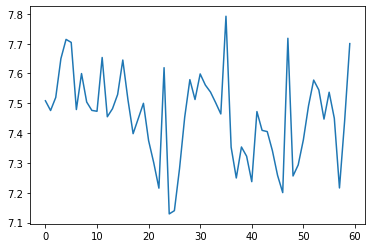

In [60]:
ts_log5 = np.log(agency_48_historical_data_sku_05.Volume)
plt.plot(ts_log5)
result = adfuller(ts_log5)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.917666
p-value: 0.043332
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


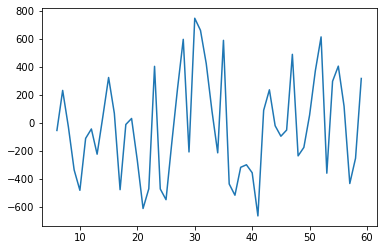

In [61]:
agency_48_historical_data_sku_05_diff = agency_48_historical_data_sku_05.Volume - agency_48_historical_data_sku_05.Volume.shift(6)
plt.plot(agency_48_historical_data_sku_05_diff)
result = adfuller(agency_48_historical_data_sku_05_diff.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.002616
p-value: 0.034651
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


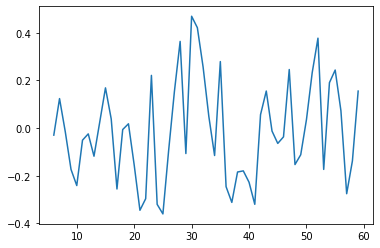

In [62]:
agency_48_historical_data_sku_05_diff_log = ts_log5 - ts_log5.shift(6)
plt.plot(agency_48_historical_data_sku_05_diff_log)
result = adfuller(agency_48_historical_data_sku_05_diff_log.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.573439
p-value: 0.098612
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


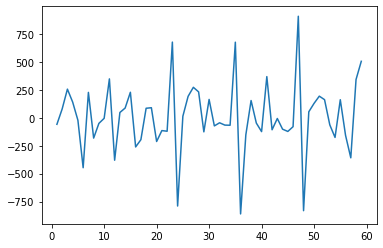

In [63]:
agency_48_historical_data_sku_05_diff = agency_48_historical_data_sku_05.Volume - agency_48_historical_data_sku_05.Volume.shift()
plt.plot(agency_48_historical_data_sku_05_diff)
result = adfuller(agency_48_historical_data_sku_05_diff.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

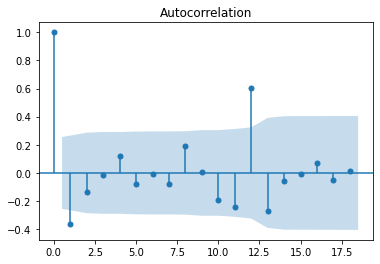

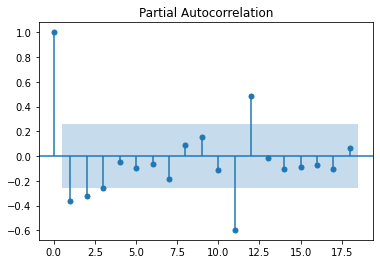

In [64]:
plot_acf(agency_48_historical_data_sku_05_diff.dropna())
pyplot.show()
plot_pacf(agency_48_historical_data_sku_05_diff.dropna())
pyplot.show()

Text(0.5, 1.0, 'RMSE: 970.0639')

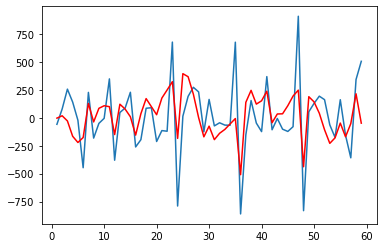

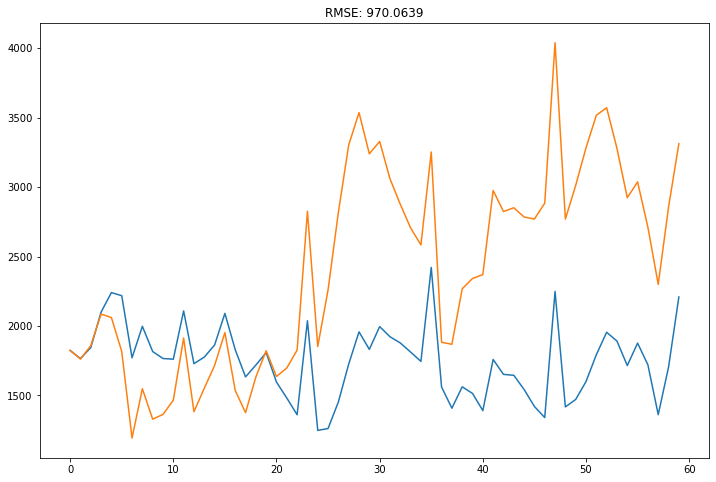

In [65]:
model_sku_05 = ARIMA(agency_48_historical_data_sku_05.Volume, order = (1,1,1))
results_ARIMA_sku_05 = model_sku_05.fit(disp=-1)
plt.plot(agency_48_historical_data_sku_05_diff)
plt.plot(results_ARIMA_sku_05.fittedvalues, color = 'red')

plt.figure(figsize=(12,8))
predictions_of_arima_sku_05_different =  pd.Series(results_ARIMA_sku_05.fittedvalues, copy=True)
predictions_of_arima_sku_05_different_cumsum = predictions_of_arima_sku_05_different.cumsum()

predictions_of_arima_sku_05 = pd.Series(agency_48_historical_data_sku_05.Volume, index=agency_48_historical_data_sku_05.Volume.index)
predictions_of_arima_sku_05 = predictions_of_arima_sku_05.add(predictions_of_arima_sku_05_different_cumsum, fill_value=0)
predictions_sku_05 = predictions_of_arima_sku_05
plt.plot(agency_48_historical_data_sku_05.Volume)
plt.plot(predictions_sku_05)
plt.title("RMSE: %.4f"% np.sqrt(sum((predictions_sku_05 - agency_48_historical_data_sku_05.Volume)**2)/len(agency_48_historical_data_sku_05.Volume)))

In [66]:
forecast = results_ARIMA_sku_05.forecast()[0]
print(forecast,'Volume forecasting for the SKU_05 on Agency 48 in January 2018')

[1770.3267245] Volume forecasting for the SKU_05 on Agency 48 in January 2018


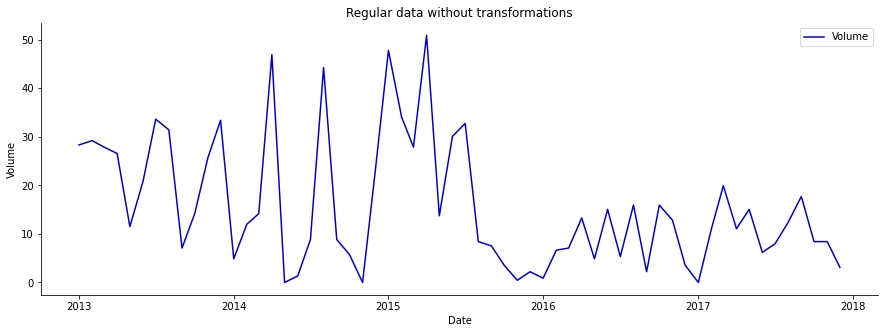

In [67]:
agency_48_historical_data_sku_07 = agency_48_historical_data[agency_48_historical_data['SKU']=='SKU_07']
agency_48_historical_data_sku_07 =agency_48_historical_data_sku_07.sort_values(by='YearMonth')
agency_48_historical_data_sku_07 = agency_48_historical_data_sku_07.reset_index()
agency_48_historical_data_sku_07.drop(columns=['index'], inplace=True)
agency_48_historical_data_sku_07.drop(columns=['Agency'], inplace=True)
agency_48_historical_data_sku_07.drop(columns=['SKU'], inplace=True)
time_plot(agency_48_historical_data_sku_07,'YearMonth', 'Volume','Regular data without transformations')

In [68]:
result = adfuller(agency_48_historical_data_sku_07.Volume)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.762812
p-value: 0.063785
Critical Values:
	1%: -3.560
	5%: -2.918
	10%: -2.597


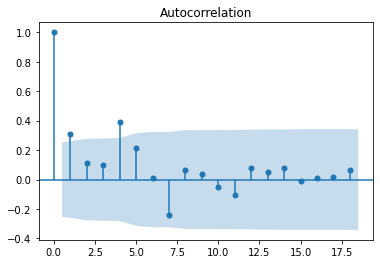

In [69]:
plot_acf(agency_48_historical_data_sku_07.Volume)
pyplot.show()

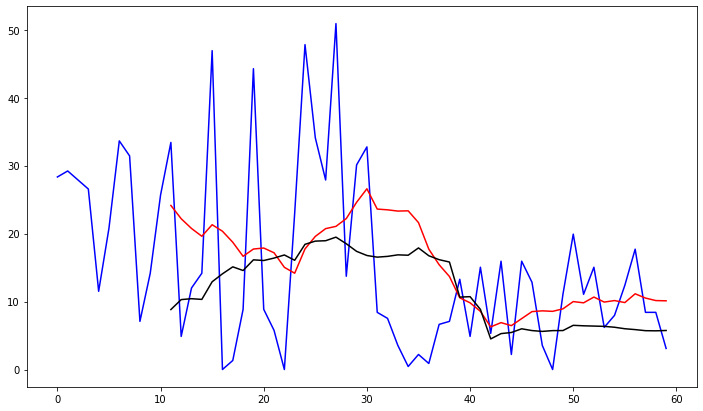

In [70]:
rollmean = agency_48_historical_data_sku_07.Volume.rolling(12).mean()
rollstd = agency_48_historical_data_sku_07.Volume.rolling(12).std()

plt.figure(figsize=(12,7))
fig = plt.figure(1)

#Plot rolling statistics:
original = plt.plot(agency_48_historical_data_sku_07.Volume, color='blue', label='original')
mean = plt.plot(rollmean, color='red', label='Rolling Mean')
std = plt.plot(rollstd, color='black', label='Rolling Std')

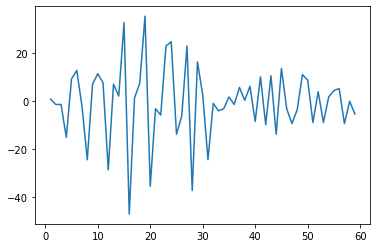

In [71]:
agency_48_historical_data_sku_07_diff = agency_48_historical_data_sku_07.Volume - agency_48_historical_data_sku_07.Volume.shift()
plt.plot(agency_48_historical_data_sku_07_diff)

In [72]:
result = adfuller(agency_48_historical_data_sku_07_diff.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.419576
p-value: 0.000000
Critical Values:
	1%: -3.553
	5%: -2.915
	10%: -2.595


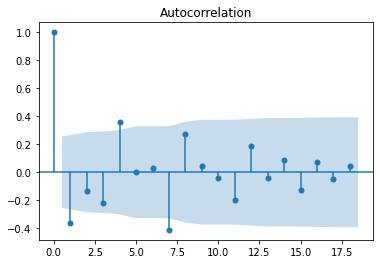

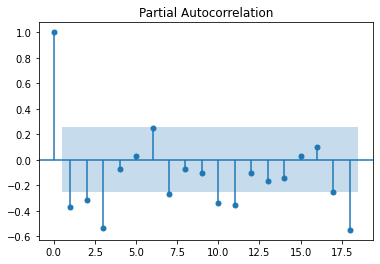

In [73]:
plot_acf(agency_48_historical_data_sku_07_diff.dropna())
pyplot.show()
plot_pacf(agency_48_historical_data_sku_07_diff.dropna())
pyplot.show()

Text(0.5, 1.0, 'RMSE: 20.7202')

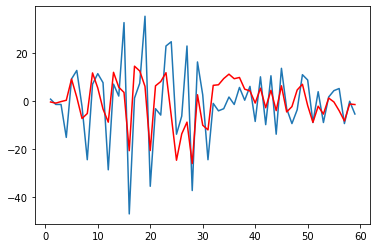

<Figure size 864x576 with 0 Axes>

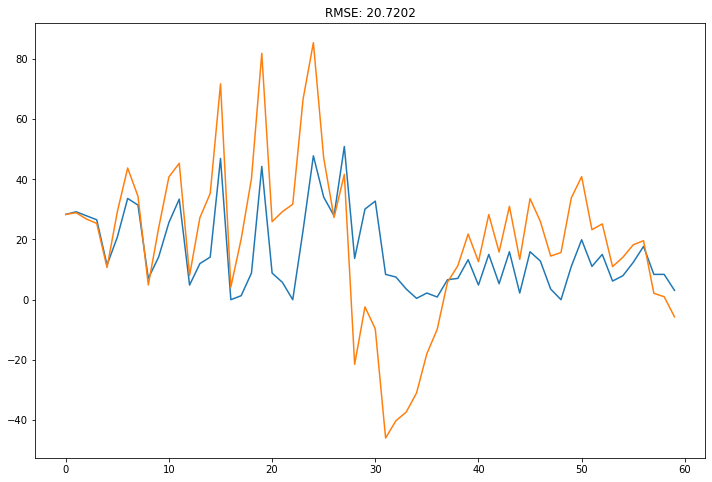

In [74]:
model_sku_07 = ARIMA(agency_48_historical_data_sku_07.Volume, order = (1,1,1))
results_ARIMA_sku_07 = model_sku_07.fit(disp=-1)
plt.plot(agency_48_historical_data_sku_07_diff)
plt.plot(results_ARIMA_sku_07.fittedvalues, color = 'red')
plt.figure(figsize=(12,8))

plt.figure(figsize=(12,8))
predictions_of_arima_sku_07_different =  pd.Series(results_ARIMA_sku_07.fittedvalues, copy=True)
predictions_of_arima_sku_07_different_cumsum = predictions_of_arima_sku_07_different.cumsum()

predictions_of_arima_sku_07 = pd.Series(agency_48_historical_data_sku_07.Volume, index=agency_48_historical_data_sku_07.Volume.index)
predictions_of_arima_sku_07 = predictions_of_arima_sku_07.add(predictions_of_arima_sku_07_different_cumsum, fill_value=0)
predictions_sku_07 = predictions_of_arima_sku_07
plt.plot(agency_48_historical_data_sku_07.Volume)
plt.plot(predictions_sku_07)
plt.title("RMSE: %.4f"% np.sqrt(sum((predictions_sku_07 - agency_48_historical_data_sku_07.Volume)**2)/len(agency_48_historical_data_sku_07.Volume)))

In [75]:
forecast = results_ARIMA_sku_07.forecast()[0]
print(forecast,'Volume forecasting for the SKU_07 on Agency 48 in January 2018')

[5.67428064] Volume forecasting for the SKU_07 on Agency 48 in January 2018


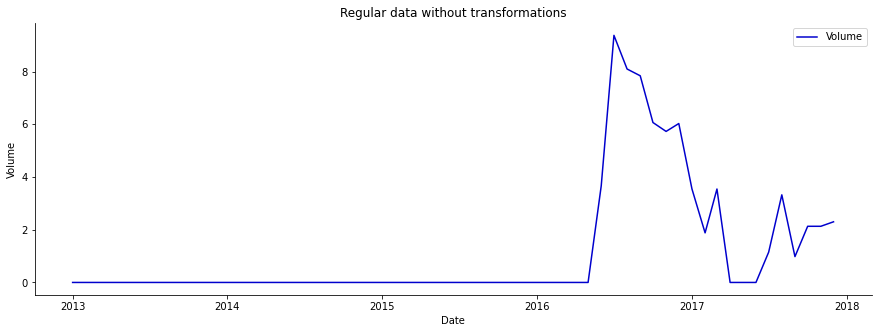

In [76]:
agency_48_historical_data_sku_17 = agency_48_historical_data[agency_48_historical_data['SKU']=='SKU_17']
agency_48_historical_data_sku_17 =agency_48_historical_data_sku_17.sort_values(by='YearMonth')
agency_48_historical_data_sku_17 = agency_48_historical_data_sku_17.reset_index()
agency_48_historical_data_sku_17.drop(columns=['index'], inplace=True)
agency_48_historical_data_sku_17.drop(columns=['Agency'], inplace=True)
agency_48_historical_data_sku_17.drop(columns=['SKU'], inplace=True)
time_plot(agency_48_historical_data_sku_17,'YearMonth', 'Volume','Regular data without transformations')

In [77]:
result = adfuller(agency_48_historical_data_sku_17.Volume)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.076087
p-value: 0.254238
Critical Values:
	1%: -3.546
	5%: -2.912
	10%: -2.594


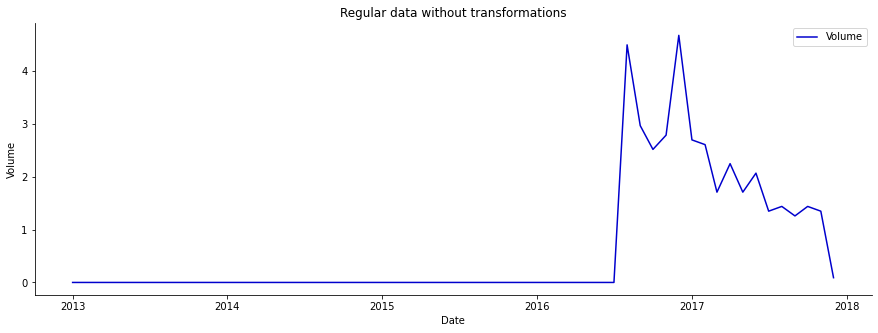

In [78]:
agency_48_historical_data_sku_23 = agency_48_historical_data[agency_48_historical_data['SKU']=='SKU_23']
agency_48_historical_data_sku_23 =agency_48_historical_data_sku_23.sort_values(by='YearMonth')
agency_48_historical_data_sku_23 = agency_48_historical_data_sku_23.reset_index()
agency_48_historical_data_sku_23.drop(columns=['index'], inplace=True)
agency_48_historical_data_sku_23.drop(columns=['Agency'], inplace=True)
agency_48_historical_data_sku_23.drop(columns=['SKU'], inplace=True)
time_plot(agency_48_historical_data_sku_23,'YearMonth', 'Volume','Regular data without transformations')

In [79]:
result = adfuller(agency_48_historical_data_sku_23.Volume)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.967466
p-value: 0.301018
Critical Values:
	1%: -3.555
	5%: -2.916
	10%: -2.596


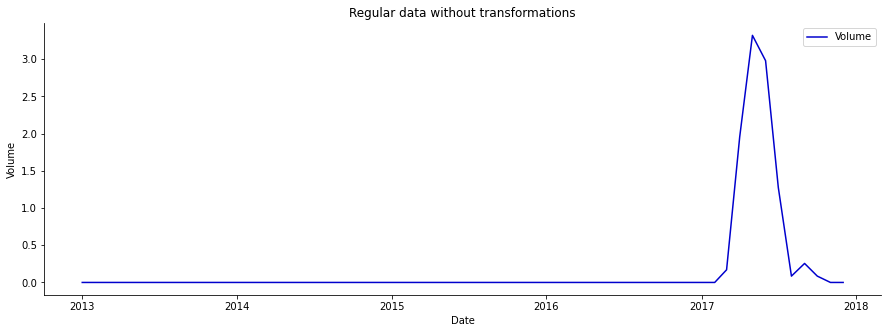

In [80]:
agency_48_historical_data_sku_28 = agency_48_historical_data[agency_48_historical_data['SKU']=='SKU_28']
agency_48_historical_data_sku_28 =agency_48_historical_data_sku_28.sort_values(by='YearMonth')
agency_48_historical_data_sku_28 = agency_48_historical_data_sku_28.reset_index()
agency_48_historical_data_sku_28.drop(columns=['index'], inplace=True)
agency_48_historical_data_sku_28.drop(columns=['Agency'], inplace=True)
agency_48_historical_data_sku_28.drop(columns=['SKU'], inplace=True)
time_plot(agency_48_historical_data_sku_28,'YearMonth', 'Volume','Regular data without transformations')

In [81]:
result = adfuller(agency_48_historical_data_sku_28.Volume)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 60.950615
p-value: 1.000000
Critical Values:
	1%: -3.568
	5%: -2.921
	10%: -2.599


### Future actions
### Train several regressors/ lstms/grus  with the cross validation from 2013 until 2016 pick up for example the 3 best models train them on 2013 until 2016, Then check the generalization performance. We pick the model with the best generalization performance, train it on data from 2013 until 2017. Finally we obtain the prediction for the Demand volume for January 2018 
### In terms with deep learning approaches there are few shot transformers for time series forecasting